In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd

In [2]:
data = pd.read_csv("./data/Credit.csv")

In [3]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,M,High School,Married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,N
29996,29997,150000,M,High School,Single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,N
29997,29998,30000,M,University,Single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,Y
29998,29999,80000,M,High School,Married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int64 
 1   LIMIT_BAL  30000 non-null  int64 
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  int64 
 6   PAY_0      30000 non-null  int64 
 7   PAY_2      30000 non-null  int64 
 8   PAY_3      30000 non-null  int64 
 9   PAY_4      30000 non-null  int64 
 10  PAY_5      30000 non-null  int64 
 11  PAY_6      30000 non-null  int64 
 12  BILL_AMT1  30000 non-null  int64 
 13  BILL_AMT2  30000 non-null  int64 
 14  BILL_AMT3  30000 non-null  int64 
 15  BILL_AMT4  30000 non-null  int64 
 16  BILL_AMT5  30000 non-null  int64 
 17  BILL_AMT6  30000 non-null  int64 
 18  PAY_AMT1   30000 non-null  int64 
 19  PAY_AMT2   30000 non-null  int64 
 20  PAY_AMT3   30000 non-null  i

In [5]:
data.describe()
data.shape
print(data.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')


In [6]:
data.drop('ID', axis=1, inplace=True) # drop the ID column

In [7]:
data.duplicated().sum() # check for duplicates

35

In [8]:
data.default.value_counts()

default
N    23364
Y     6636
Name: count, dtype: int64

In [9]:
data.SEX.value_counts()

SEX
F    18112
M    11888
Name: count, dtype: int64

In [10]:
data.EDUCATION.value_counts()

EDUCATION
University         14030
Graduate school    10585
High School         4917
Unknown              331
Others               123
0                     14
Name: count, dtype: int64

In [11]:
data.MARRIAGE.value_counts()

MARRIAGE
Single     15964
Married    13659
Other        323
0             54
Name: count, dtype: int64

In [12]:
import seaborn as sns

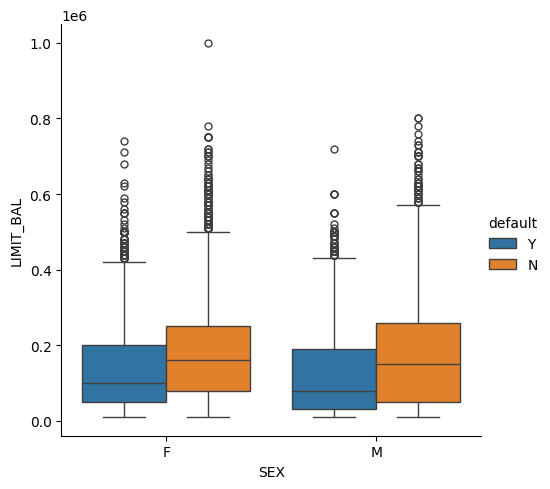

In [13]:
sns.catplot(x='SEX', y='LIMIT_BAL', hue='default', kind='box', data=data)

<Axes: >

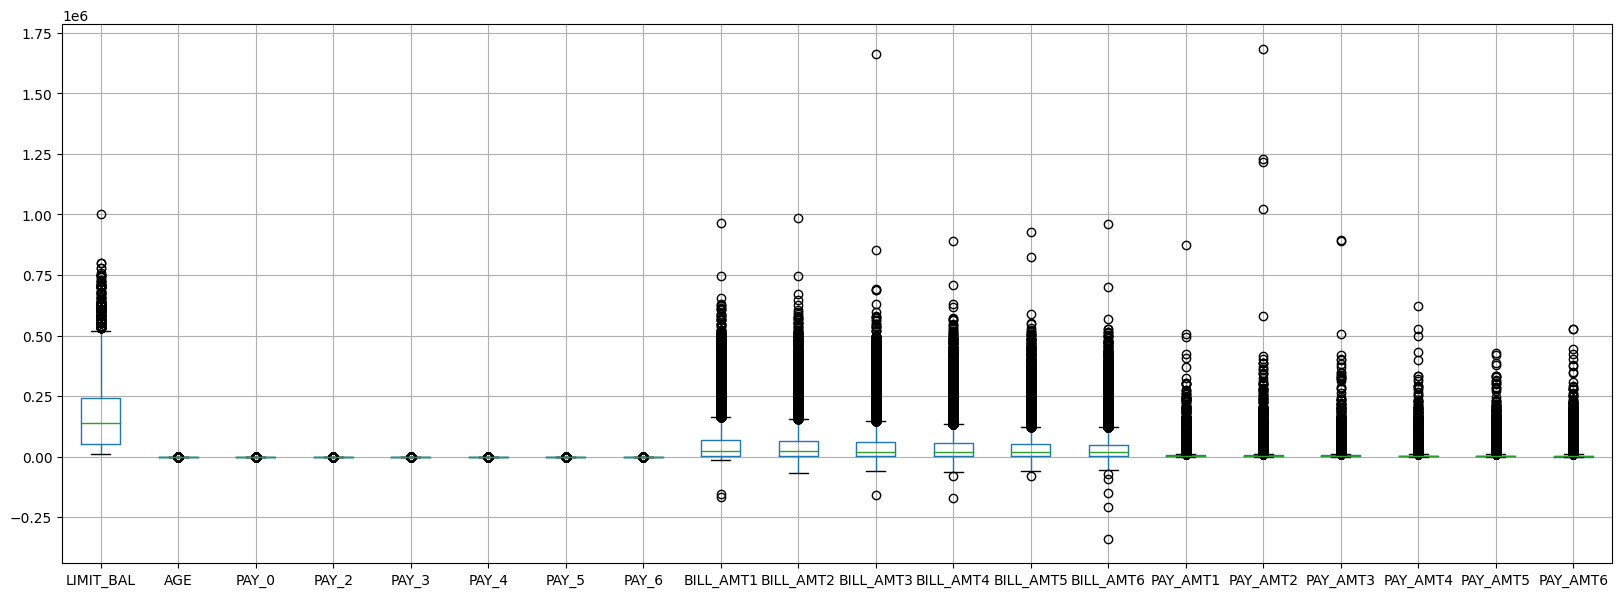

In [14]:
plt.figure(figsize=(20, 7))
data.boxplot()

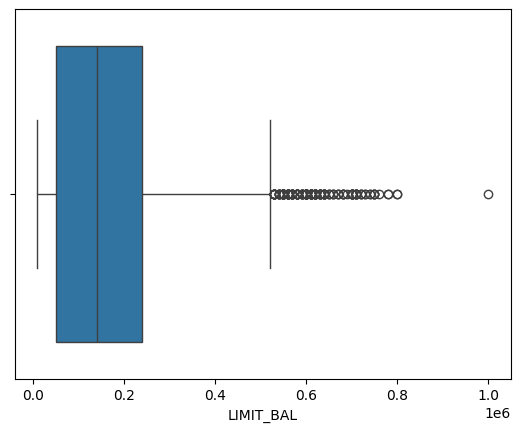

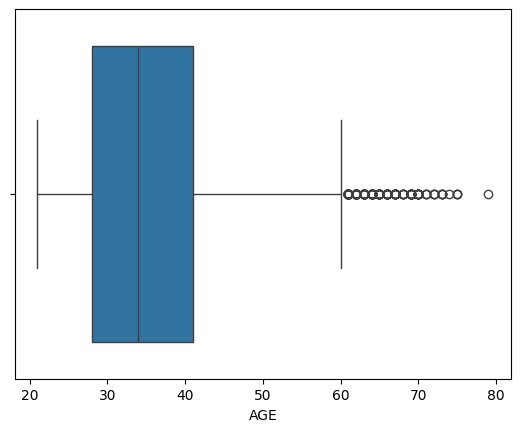

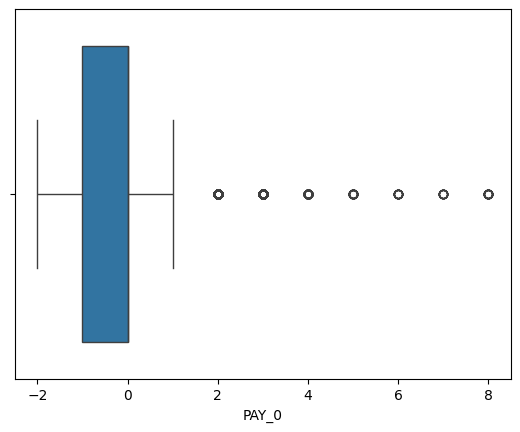

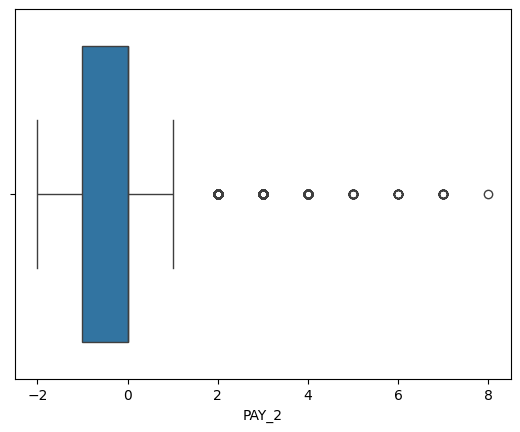

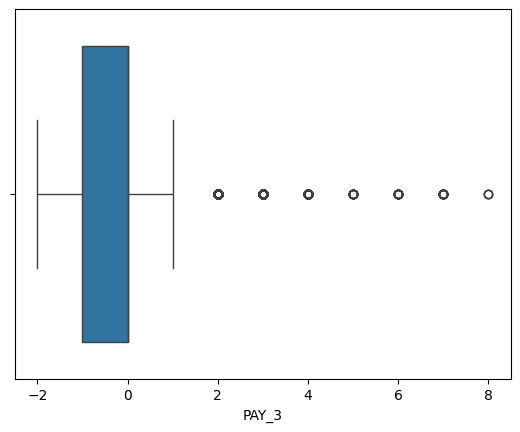

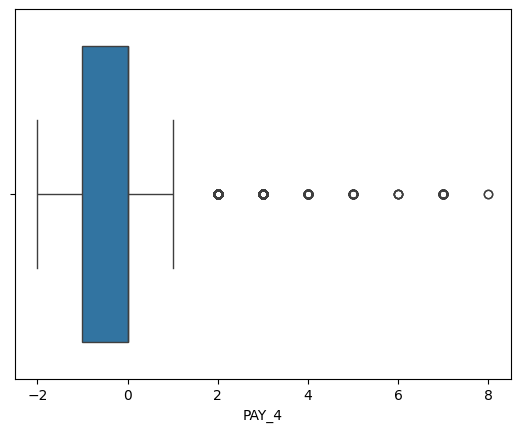

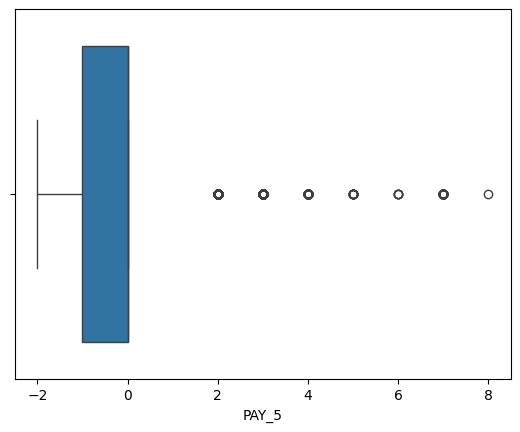

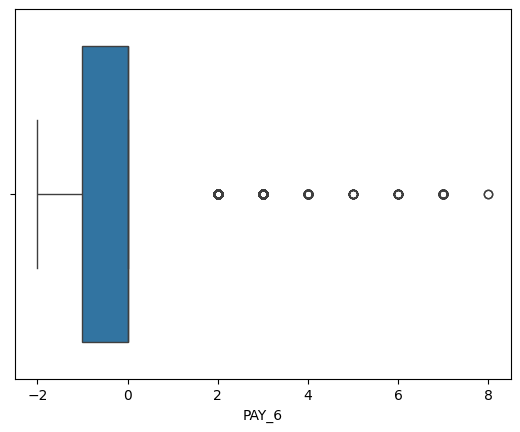

In [15]:
features = ['LIMIT_BAL', 'AGE', 'PAY_0',
            'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for feature in features:
    sns.boxplot(x=feature, data=data)
    plt.show()

<Axes: xlabel='PAY_AMT1'>

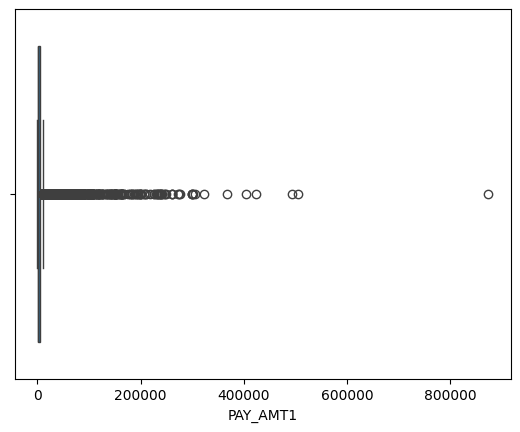

In [16]:
sns.boxplot(x='PAY_AMT1', data=data)

<Axes: xlabel='BILL_AMT1'>

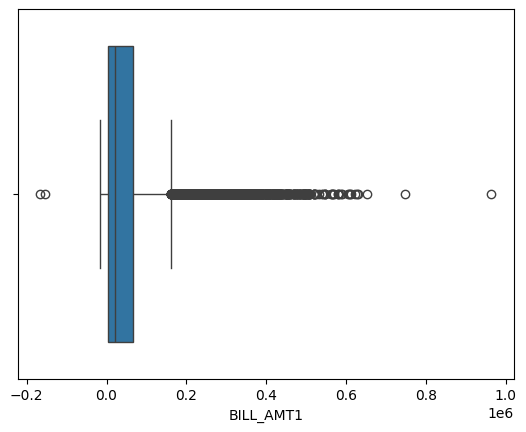

In [17]:
sns.boxplot(x='BILL_AMT1', data=data)

In [18]:
train = data[(data['AGE'] <= 60) & (data['PAY_0'] <=2) & (data['PAY_2'] <=2) & (data['PAY_3'] <=2) & (data['PAY_4'] <=2) & (data['PAY_5'] <=2) & (data['PAY_6'] <=2) & (data['LIMIT_BAL'] <=600000)]

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28470 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  28470 non-null  int64 
 1   SEX        28470 non-null  object
 2   EDUCATION  28470 non-null  object
 3   MARRIAGE   28470 non-null  object
 4   AGE        28470 non-null  int64 
 5   PAY_0      28470 non-null  int64 
 6   PAY_2      28470 non-null  int64 
 7   PAY_3      28470 non-null  int64 
 8   PAY_4      28470 non-null  int64 
 9   PAY_5      28470 non-null  int64 
 10  PAY_6      28470 non-null  int64 
 11  BILL_AMT1  28470 non-null  int64 
 12  BILL_AMT2  28470 non-null  int64 
 13  BILL_AMT3  28470 non-null  int64 
 14  BILL_AMT4  28470 non-null  int64 
 15  BILL_AMT5  28470 non-null  int64 
 16  BILL_AMT6  28470 non-null  int64 
 17  PAY_AMT1   28470 non-null  int64 
 18  PAY_AMT2   28470 non-null  int64 
 19  PAY_AMT3   28470 non-null  int64 
 20  PAY_AMT4   28470 non-null  int64 

In [20]:
train.default.value_counts()

default
N    22658
Y     5812
Name: count, dtype: int64

In [21]:
train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,F,University,Married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,Y
1,120000,F,University,Single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,90000,F,University,Single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,50000,F,University,Married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,50000,M,University,Married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,80000,M,University,Single,34,2,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,Y
29995,220000,M,High School,Married,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,N
29996,150000,M,High School,Single,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,N
29998,80000,M,High School,Married,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,Y


In [22]:
train = pd.get_dummies(train, columns=['EDUCATION','MARRIAGE'], dtype=int, drop_first=True) # change education and marriage to categorical variables

In [23]:
encoders_nums = {
    "SEX": {"F": 0, "M": 1},
    "default": {"N": 0, "Y": 1},
}
train = train.replace(encoders_nums)

In [24]:
train

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT6,default,EDUCATION_Graduate school,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,EDUCATION_Unknown,MARRIAGE_Married,MARRIAGE_Other,MARRIAGE_Single
0,20000,0,24,2,2,-1,-1,-2,-2,3913,...,0,1,0,0,0,1,0,1,0,0
1,120000,0,26,-1,2,0,0,0,2,2682,...,2000,1,0,0,0,1,0,0,0,1
2,90000,0,34,0,0,0,0,0,0,29239,...,5000,0,0,0,0,1,0,0,0,1
3,50000,0,37,0,0,0,0,0,0,46990,...,1000,0,0,0,0,1,0,1,0,0
4,50000,1,57,-1,0,-1,0,0,0,8617,...,679,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,80000,1,34,2,2,2,2,2,2,72557,...,4000,1,0,0,0,1,0,0,0,1
29995,220000,1,39,0,0,0,0,0,0,188948,...,1000,0,0,1,0,0,0,1,0,0
29996,150000,1,43,-1,-1,-1,-1,0,0,1683,...,0,0,0,1,0,0,0,0,0,1
29998,80000,1,41,1,-1,0,0,0,-1,-1645,...,1804,1,0,1,0,0,0,1,0,0


In [25]:
X = train.drop('default', axis=1)
y = train.default

In [26]:
y.value_counts()

default
0    22658
1     5812
Name: count, dtype: int64

In [27]:
columns = train.drop('default', axis=1).columns

In [28]:
columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_Graduate school',
       'EDUCATION_High School', 'EDUCATION_Others', 'EDUCATION_University',
       'EDUCATION_Unknown', 'MARRIAGE_Married', 'MARRIAGE_Other',
       'MARRIAGE_Single'],
      dtype='object')

In [29]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X, y = sm.fit_resample(X, y) # make the x y balanced

In [30]:
y.value_counts()

default
1    22658
0    22658
Name: count, dtype: int64

In [31]:
X.value_counts()

LIMIT_BAL  SEX  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  EDUCATION_Graduate school  EDUCATION_High School  EDUCATION_Others  EDUCATION_University  EDUCATION_Unknown  MARRIAGE_Married  MARRIAGE_Other  MARRIAGE_Single
360000     0    36   -2     -2     -2     -2     -2     -2     0          0          0          0          0          0          0         0         0         0         0         0         1                          0                      0                 0                     0                  1                 0               0                  7
           1    41    1     -2     -2     -2     -2     -2     0          0          0          0          0          0          0         0         0         0         0         0         0                          0                      0                 1                     0                  1

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X) # scale the data to make it easier for the model to learn

In [33]:
X

array([[-1.10494165, -0.67807197, -1.33032759, ...,  1.29681822,
        -0.08204504, -0.87353459],
       [-0.29491679, -0.67807197, -1.09087713, ..., -0.7711181 ,
        -0.08204504,  1.14477436],
       [-0.53792425, -0.67807197, -0.1330753 , ..., -0.7711181 ,
        -0.08204504,  1.14477436],
       ...,
       [-1.18594414,  1.47476971, -0.49225098, ..., -0.7711181 ,
        -0.08204504,  1.14477436],
       [-1.10494165,  1.47476971, -0.37252575, ..., -0.7711181 ,
        -0.08204504, -0.87353459],
       [-1.02393917,  1.47476971,  0.34582562, ..., -0.7711181 ,
        -0.08204504, -0.87353459]])

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [35]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [36]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(gnb.score(X_test, y_test))

0.5510849577050386


In [37]:
param_lr = {'penalty': ['none','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [38]:
grid_lr = GridSearchCV(LogisticRegression(), param_lr,
                       scoring='accuracy', n_jobs=-1, verbose=3, cv=5)
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.p

[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.823 total time=   0.2s
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.820 total time=   0.2s
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.826 total time=   0.2s
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.830 total time=   0.2s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.810 total time=   0.2s
[CV 2/5] END ................C=0.01, penalty=l2;, score=0.833 total time=   0.4s
[CV 1/5] END ................C=0.01, penalty=l2;, score=0.825 total time=   0.4s
[CV 4/5] END ................C=0.01, penalty=l2;, score=0.825 total time=   0.4s
[CV 5/5] END .............C=0.001, penalty=none;, score=0.813 total time=   0.5s
[CV 5/5] END ..............C=0.01, penalty=none;, score=0.813 total time=   0.6s
[CV 2/5] END ..............C=0.01, penalty=none;, score=0.832 total time=   0.6s

/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.p


[CV 4/5] END .............C=0.001, penalty=none;, score=0.823 total time=   0.7s
[CV 3/5] END ..............C=0.01, penalty=none;, score=0.821 total time=   0.7s
[CV 4/5] END ..............C=0.01, penalty=none;, score=0.823 total time=   0.8s
[CV 2/5] END ...............C=0.1, penalty=none;, score=0.832 total time=   0.7s
[CV 1/5] END ..............C=0.01, penalty=none;, score=0.826 total time=   0.8s


/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/louis/anaconda3/envs/big_data/li

[CV 2/5] END .............C=0.001, penalty=none;, score=0.832 total time=   0.9s
[CV 2/5] END .................C=0.1, penalty=l2;, score=0.832 total time=   0.5s
[CV 3/5] END ................C=0.01, penalty=l2;, score=0.821 total time=   0.6s
[CV 4/5] END .................C=0.1, penalty=l2;, score=0.824 total time=   0.5s
[CV 3/5] END .................C=0.1, penalty=l2;, score=0.821 total time=   0.6s[CV 1/5] END .................C=0.1, penalty=l2;, score=0.825 total time=   0.6s

[CV 5/5] END ...............C=0.1, penalty=none;, score=0.813 total time=   0.6s
[CV 5/5] END .................C=0.1, penalty=l2;, score=0.813 total time=   0.5s
[CV 5/5] END ................C=0.01, penalty=l2;, score=0.814 total time=   0.6s


/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.p

[CV 3/5] END .............C=0.001, penalty=none;, score=0.821 total time=   1.0s
[CV 2/5] END .................C=1, penalty=none;, score=0.832 total time=   0.7s
[CV 1/5] END .............C=0.001, penalty=none;, score=0.826 total time=   1.0s
[CV 3/5] END .................C=1, penalty=none;, score=0.821 total time=   0.7s
[CV 1/5] END .................C=1, penalty=none;, score=0.826 total time=   0.9s
[CV 5/5] END .................C=1, penalty=none;, score=0.813 total time=   0.7s
[CV 1/5] END ...............C=0.1, penalty=none;, score=0.826 total time=   1.0s
[CV 4/5] END .................C=1, penalty=none;, score=0.823 total time=   0.7s
[CV 1/5] END ...................C=1, penalty=l2;, score=0.826 total time=   0.7s
[CV 4/5] END ...............C=0.1, penalty=none;, score=0.823 total time=   1.0s
[CV 2/5] END ...................C=1, penalty=l2;, score=0.832 total time=   0.7s


/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.p

[CV 3/5] END ...................C=1, penalty=l2;, score=0.821 total time=   0.7s
[CV 4/5] END ...................C=1, penalty=l2;, score=0.823 total time=   0.7s
[CV 5/5] END ...................C=1, penalty=l2;, score=0.813 total time=   0.7s
[CV 5/5] END ................C=10, penalty=none;, score=0.813 total time=   0.7s
[CV 3/5] END ...............C=0.1, penalty=none;, score=0.821 total time=   1.1s
[CV 2/5] END ................C=10, penalty=none;, score=0.832 total time=   0.8s
[CV 1/5] END ..................C=10, penalty=l2;, score=0.826 total time=   0.7s


/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.p

[CV 3/5] END ................C=10, penalty=none;, score=0.821 total time=   0.8s[CV 1/5] END ................C=10, penalty=none;, score=0.826 total time=   0.9s

[CV 4/5] END ..................C=10, penalty=l2;, score=0.823 total time=   0.7s
[CV 5/5] END ..................C=10, penalty=l2;, score=0.813 total time=   0.8s
[CV 2/5] END ...............C=100, penalty=none;, score=0.832 total time=   0.7s
[CV 4/5] END ...............C=100, penalty=none;, score=0.823 total time=   0.7s
[CV 3/5] END ...............C=100, penalty=none;, score=0.821 total time=   0.8s
[CV 4/5] END ................C=10, penalty=none;, score=0.823 total time=   1.2s
[CV 3/5] END ..................C=10, penalty=l2;, score=0.821 total time=   1.0s
[CV 2/5] END ..................C=10, penalty=l2;, score=0.832 total time=   1.1s
[CV 1/5] END .................C=100, penalty=l2;, score=0.826 total time=   0.8s
[CV 4/5] END .................C=100, penalty=l2;, score=0.823 total time=   0.6s
[CV 5/5] END ...............

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['none', 'l2']},
             scoring='accuracy', verbose=3)

In [39]:
optimized_lr = grid_lr.best_estimator_
optimized_lr

LogisticRegression(C=0.01)

In [40]:
grid_lr.best_score_

0.8236498985906031

In [41]:
grid_lr.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [42]:
lr_train_pred = optimized_lr.predict(X_train)
lr_test_pred = optimized_lr.predict(X_test)

In [43]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("The accuracy on train data is ", accuracy_score(lr_train_pred, y_train))
print("The accuracy on test data is ", accuracy_score(lr_test_pred, y_test))
print("The precision on test data is ", precision_score(lr_test_pred, y_test))
print("The recall on test data is ", recall_score(lr_test_pred, y_test))
print("The f1 on test data is ", f1_score(lr_test_pred, y_test))
print("The roc_score on test data is ", roc_auc_score(lr_test_pred, y_test))

The accuracy on train data is  0.8238706219854355
The accuracy on test data is  0.8267009930121368
The precision on test data is  0.7153295556218312
The recall on test data is  0.9147597254004577
The f1 on test data is  0.8028451882845188
The roc_score on test data is  0.8430821738006959


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

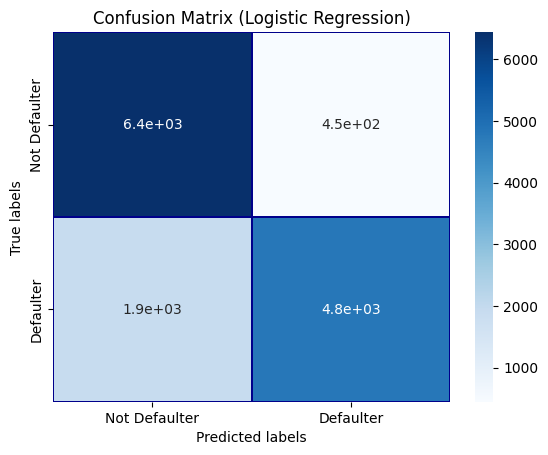

In [44]:
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, lr_test_pred)


ax = plt.subplot()
sns.heatmap(cm,
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True, ax=ax,
            linewidths=.2, linecolor="Darkblue", cmap="Blues")  # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix (Logistic Regression)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

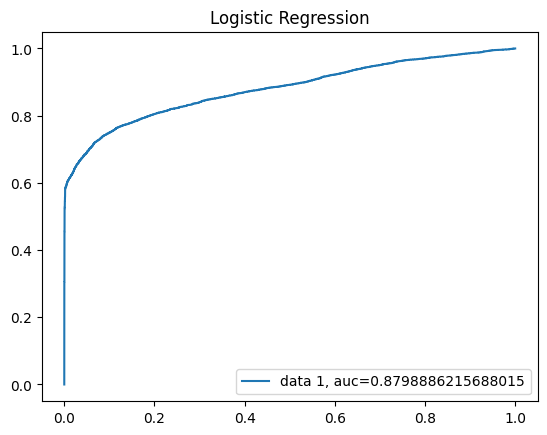

In [45]:
y_preds_proba_lr = optimized_lr.predict_proba(X_test)[::, 1]
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.title('Logistic Regression')
plt.legend(loc=4)
plt.show()